# Natural Language Processing Using Twitter Sentiment

## Overview

In one day, there are over 500 million tweets among all twitter users. That's 6,000 tweets every second.(https://www.brandwatch.com/blog/twitter-stats-and-statistics/). They could be about a person, place, or thing. In this case, it will be about products. This project is focused around identifying positive, negative, or neutral sentiment in a Tweet using natural language processing. 

## Business Understanding

The goal of this project is to build a Natural Processing Language model to analyze twitter sentiments about Apple and Google products as either positive, negative or neutral tweets. Companies can be benefitted from understanding how a person/consumers consider their brands and products.

## Approach

We will follow the OSEMN (Obtain-Scrub-Explore-Model-Interpret)process for this project.

The Dataset is obtained from crowdflower and it has 9000 rows and 3 columns. After obtaining the data, started with the pre-processing of the dataset and it includes 

- Data cleaning and exploration to sort into relevant categories
- Tokenization of words and removal of stop words
- Vectorization of text data using TF-IDF(Term Frequency Inverse Document Frequency)

This is a multiclass problem, where sentiments are either negative, positive, or neutral. 

Our first step is to import all the necessary packages and load the dataframe.



In [1]:
# Import Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from matplotlib import cm
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV, cross_val_score
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score
from nltk.probability import FreqDist
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from xgboost import XGBClassifier

from wordcloud import WordCloud
#imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

import string, re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prabaginithambinathan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prabaginithambinathan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prabaginithambinathan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Obtained the dataset from CrowdFlower Source: https://data.world/crowdflower/brands-and-product-emotions

In [2]:
#load the dataframe
df = pd.read_csv('../Data/tweets.csv', encoding= 'unicode_escape')

In [3]:
# Preview first five rows of our data
df.head()

,ï»¿tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   ï»¿tweet_text                                       9261 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 217.8+ KB


In [5]:
#checking the shape of the dataframe
df.shape

(9288, 3)

Since the column names are very long, we are renaming them as ('tweet_text', 'tweet_product', 'emotion'). 

In [6]:
# Renaming the column names
df.columns = ['tweet_text', 'tweet_product', 'emotion']

In [7]:
#printing the first five rows of dataframe after renaming the column
df.head()

,tweet_text,tweet_product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Scrub

In the Process of scrub, data cleaning starts with checking for duplicates and null values.  

Let's see if there is any null values in the given datasets

In [8]:
#checking for the null values
df.isna().sum()

tweet_text         27
tweet_product    5997
emotion           195
dtype: int64

In [9]:
#checking the tweet_text column null values
df[df['tweet_text'].isnull()]

,tweet_text,tweet_product,emotion
6,NaN,NaN,No emotion toward brand or product
181,NaN,NaN,NaN
183,NaN,NaN,NaN
185,NaN,NaN,NaN
408,NaN,NaN,NaN
409,NaN,NaN,NaN
593,NaN,NaN,NaN
1359,NaN,NaN,NaN
1501,NaN,NaN,NaN
1597,NaN,NaN,NaN


### Drop the null tweet

In [10]:
#dropping the null values from tweet_text column
df.dropna(subset = ['tweet_text'], inplace = True)

In [11]:
#checking for the null values
df.isna().sum()

tweet_text          0
tweet_product    5970
emotion           169
dtype: int64

Checking for Duplicated Tweets:

If there are duplicated tweets, they won't add useful information and we will drop them.

In [12]:
#shape of the dataframe
df.shape

(9261, 3)

In [13]:
# filtering duplicates
duplicates = df[df['tweet_text'].duplicated()]

In [14]:
len(duplicates)

94

In [15]:
#there are duplicates present in the dataset.
duplicates

,tweet_text,tweet_product,emotion
406,"The Daily Chord - Tuesday, March 8:Â",NaN,No emotion toward brand or product
453,{link} #SXSW #UXDes,NaN,NaN
455,{link} #SXSW #UXDes,NaN,NaN
488,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
595,â°Ð«Ð@mention Google to Launch Major New Soc...,Other Google product or service,Negative emotion
...,...,...,...
8914,#StartupBus #SXSW,NaN,NaN
8936,#woohoo,NaN,NaN
8939,Need to buy an iPad2 while I'm in Austin at #s...,iPad,Positive emotion
9100,Apple is opening a pop-up store in Austin for ...,NaN,NaN


In [16]:
#Dropping the duplicates
df.drop_duplicates(subset='tweet_text',inplace=True)

In [17]:
df.shape

(9167, 3)

In [18]:
# reviewing values for target data
df.emotion.value_counts(dropna=False)

No emotion toward brand or product    5365
Positive emotion                      2967
Negative emotion                       568
I can't tell                           156
NaN                                    111
Name: emotion, dtype: int64

Since the NaN value is 111, we will drop these values. 

In [19]:
#Dropping the null values from the emotion column
df.dropna(subset=['emotion'], inplace=True)

In [20]:
#check the value counts for emotion column
df.emotion.value_counts(dropna=False)

No emotion toward brand or product    5365
Positive emotion                      2967
Negative emotion                       568
I can't tell                           156
Name: emotion, dtype: int64

In [21]:
# creating a variable to extract 'I can't tell' emotion
cant_tell = df[df.emotion == "I can't tell"]
cant_tell

,tweet_text,tweet_product,emotion
90,Thanks to @mention for publishing the news of ...,NaN,I can't tell
102,â°Ð«Ð@mention &quot;Apple has opened a pop-u...,NaN,I can't tell
244,Just what America needs. RT @mention Google to...,NaN,I can't tell
348,The queue at the Apple Store in Austin is FOUR...,NaN,I can't tell
375,Hope it's better than wave RT @mention Buzz is...,NaN,I can't tell
...,...,...,...
9215,It's funny watching a room full of people hold...,NaN,I can't tell
9227,"@mention yeah, we have @mention , Google has n...",NaN,I can't tell
9232,"@mention Yes, the Google presentation was not ...",NaN,I can't tell
9253,&quot;Do you know what Apple is really good at...,NaN,I can't tell


In [22]:
# drop cant_tell rows, only want positive/negative/neutral emotion 
df.drop(cant_tell.index, inplace = True)

In [23]:
# check the shape of dataset
df.shape

(8900, 3)

In [24]:
#check the value count of the emotion column
df.emotion.value_counts(dropna=False)

No emotion toward brand or product    5365
Positive emotion                      2967
Negative emotion                       568
Name: emotion, dtype: int64

No emotion toward brand or product says that they have neutral emotion towards the tweet. It is either poisitve or negative. lets remap the category No emotion toward brand or product to neutral emotion.

In [25]:
#remap categories 
emotion_map = {'No emotion toward brand or product': 'Neutral emotion', 
              'Positive emotion': 'Positive emotion',
              'Negative emotion': 'Negative emotion'}

df.emotion = df.emotion.map(emotion_map)
df.emotion.value_counts()

Neutral emotion     5365
Positive emotion    2967
Negative emotion     568
Name: emotion, dtype: int64

In [26]:
# check the value counts for column tweet_product 
df.tweet_product.value_counts(dropna=False)

NaN                                5631
iPad                                939
Apple                               657
iPad or iPhone App                  468
Google                              427
iPhone                              295
Other Google product or service     291
Android App                          80
Android                              77
Other Apple product or service       35
Name: tweet_product, dtype: int64

### Explore

The next step is to explore the given dataset with data visualization.



Creating a column for company in dataframe

The function to separate the Apple and Google product or services and create column 'company'.

In [27]:
#fuction to separate Apple and Google products
def get_company(row):
    lst = ['iPad','Apple','iPad or iPhone App','iPhone','Other Apple product or service']
    if row['tweet_product'] is np.nan:
        return np.nan
    if row['tweet_product'] in lst:
        return 'Apple'
    else:
        return 'Google'

In [28]:
#creating the column company in dataframe
df['company'] = df.apply(get_company, axis = 1)

In [29]:
#printing the first 5 rows of dataframe
df.head()

,tweet_text,tweet_product,emotion,company
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google


In [30]:
#checking the values of company column
df['company'].value_counts()

Apple     2394
Google     875
Name: company, dtype: int64

Using seaborn counterplot, plotting the graph to compare the tweet between both the brands.

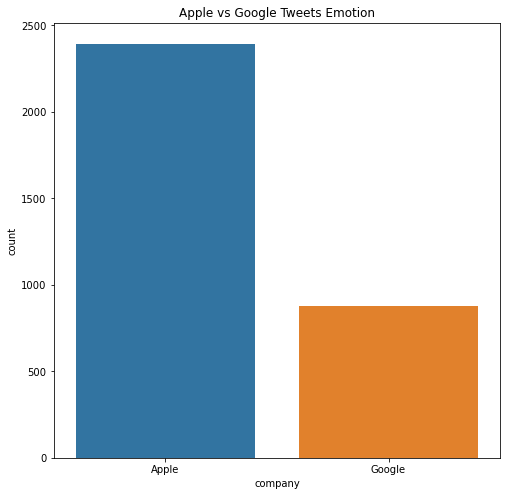

In [31]:
#counterplot of company with emotion
plt.figure(figsize=(8,8))
sns.countplot(x="company", data=df)
plt.title('Apple vs Google Tweets Emotion')
plt.show()

From the above graph Apple has more tweets than Google.

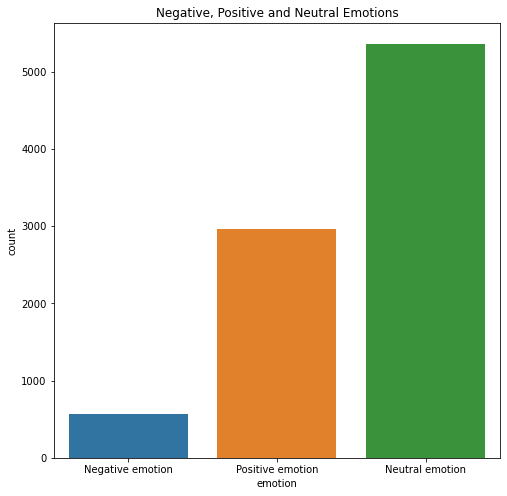

In [32]:
#counterplot of company with emotion
plt.figure(figsize=(8,8))
sns.countplot(x="emotion", data=df)
plt.title('Negative, Positive and Neutral Emotions')
plt.show()

From the above graph it shows neutral emotion has more tweets than the negative and positive emotions

I wanted to remove punctuation and word such as ''s', '2' from the tweets using stopwords. These words doesn't make any meaning to the tweets.

In [33]:
#list of stopwords in tweets
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', 's', '2']

In [34]:
#fuction to remove the non-words
def remove_nonwords(string):
    return re.sub("[^A-Za-z ]\w*", ' ', string)

In [35]:
#function to process the tweets
def process_tweet(tweet):
    tw = remove_nonwords(tweet)
    tokens = nltk.word_tokenize(tw)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed

In [36]:
#differentiating three different emotions 
df_negative = df[df['emotion'] == 'Negative emotion']
df_neutral = df[df['emotion'] == 'Neutral emotion']
df_positive = df[df['emotion'] == 'Positive emotion']

In [37]:
df_negative

,tweet_text,tweet_product,emotion,company
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion,Apple
38,@mentionÂ - False Alarm: Google Circles Not C...,Google,Negative emotion,Google
64,Again? RT @mention Line at the Apple store is ...,NaN,Negative emotion,NaN
...,...,...,...,...
9168,Google guy at #sxsw talk is explaining how he ...,NaN,Negative emotion,NaN
9176,I think my effing hubby is in line for an #iPa...,iPad,Negative emotion,Apple
9203,I'm pretty sure the panelist that thinks &quot...,Apple,Negative emotion,Apple
9238,Hey is anyone doing #sxsw signing up for the g...,NaN,Negative emotion,NaN


In [38]:
df_positive

,tweet_text,tweet_product,emotion,company
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,Google
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,Apple
...,...,...,...,...
9267,@mention your iPhone 4 cases are Rad and Ready...,iPhone,Positive emotion,Apple
9272,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion,Apple
9274,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion,Apple
9280,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion,Apple


In [39]:
#tweet_text column 
data_negative = df_negative['tweet_text']
data_neutral = df_neutral['tweet_text']
data_positive = df_positive['tweet_text']

In [40]:
data_negative

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
3       @sxsw I hope this year's festival isn't as cra...
17      I just noticed DST is coming this weekend. How...
38      @mentionÂ  - False Alarm: Google Circles Not C...
64      Again? RT @mention Line at the Apple store is ...
                              ...                        
9168    Google guy at #sxsw talk is explaining how he ...
9176    I think my effing hubby is in line for an #iPa...
9203    I'm pretty sure the panelist that thinks &quot...
9238    Hey is anyone doing #sxsw signing up for the g...
9275    Diller says Google TV &quot;might be run over ...
Name: tweet_text, Length: 568, dtype: object

In [41]:
process_negative = list(map(process_tweet, data_negative))
process_neutral = list(map(process_tweet, data_neutral))
process_positive = list(map(process_tweet, data_positive))

In [42]:
flat_negative = [item for sublist in process_negative for item in sublist]
flat_neutral = [item for sublist in process_neutral for item in sublist]
flat_positive = [item for sublist in process_positive for item in sublist]

In [43]:
#frequency distribution of tweet 
negative_freq = FreqDist(flat_negative)
neutral_freq = FreqDist(flat_neutral)
positive_freq = FreqDist(flat_positive)

In [44]:
#top 25 most common words in negative emotion
negative_freq.most_common(25)

[('ipad', 178),
 ('iphone', 149),
 ('rt', 137),
 ('google', 128),
 ('apple', 96),
 ('app', 60),
 ('store', 46),
 ('new', 42),
 ('like', 39),
 ('design', 29),
 ('people', 29),
 ('apps', 26),
 ('social', 26),
 ('need', 25),
 ('austin', 25),
 ('circles', 24),
 ('get', 24),
 ('one', 23),
 ('launch', 21),
 ('android', 20),
 ('today', 20),
 ('would', 19),
 ('line', 18),
 ('time', 18),
 ('think', 18)]

In [45]:
#top 25 most common words in Neutral emotion
neutral_freq.most_common(25)

[('rt', 1828),
 ('google', 1391),
 ('ipad', 1149),
 ('apple', 995),
 ('store', 861),
 ('new', 662),
 ('iphone', 653),
 ('austin', 557),
 ('social', 464),
 ('launch', 446),
 ('today', 428),
 ('circles', 388),
 ('app', 346),
 ('network', 343),
 ('pop', 325),
 ('sxsw', 323),
 ('called', 264),
 ('android', 263),
 ('line', 246),
 ('free', 238),
 ('via', 221),
 ('major', 214),
 ('party', 205),
 ('mobile', 203),
 ('get', 200)]

In [46]:
#top 25 most common word in Positive emotion
positive_freq.most_common(25)

[('ipad', 995),
 ('rt', 930),
 ('apple', 702),
 ('google', 627),
 ('store', 542),
 ('iphone', 457),
 ('app', 386),
 ('new', 357),
 ('austin', 253),
 ('pop', 203),
 ('launch', 158),
 ('android', 157),
 ('get', 157),
 ('one', 147),
 ('sxsw', 141),
 ('great', 134),
 ('line', 131),
 ('party', 129),
 ('time', 127),
 ('social', 121),
 ('cool', 116),
 ('free', 114),
 ('like', 113),
 ('today', 113),
 ('w', 108)]

In [47]:
# create counts of negative, neutral and positive with values and words
negative_bar_counts = [x[1] for x in negative_freq.most_common(25)]
negative_bar_words = [x[0] for x in negative_freq.most_common(25)]

neutral_bar_counts = [x[1] for x in neutral_freq.most_common(25)]
neutral_bar_words = [x[0] for x in neutral_freq.most_common(25)]

positive_bar_counts = [x[1] for x in positive_freq.most_common(25)]
positive_bar_words = [x[0] for x in positive_freq.most_common(25)]

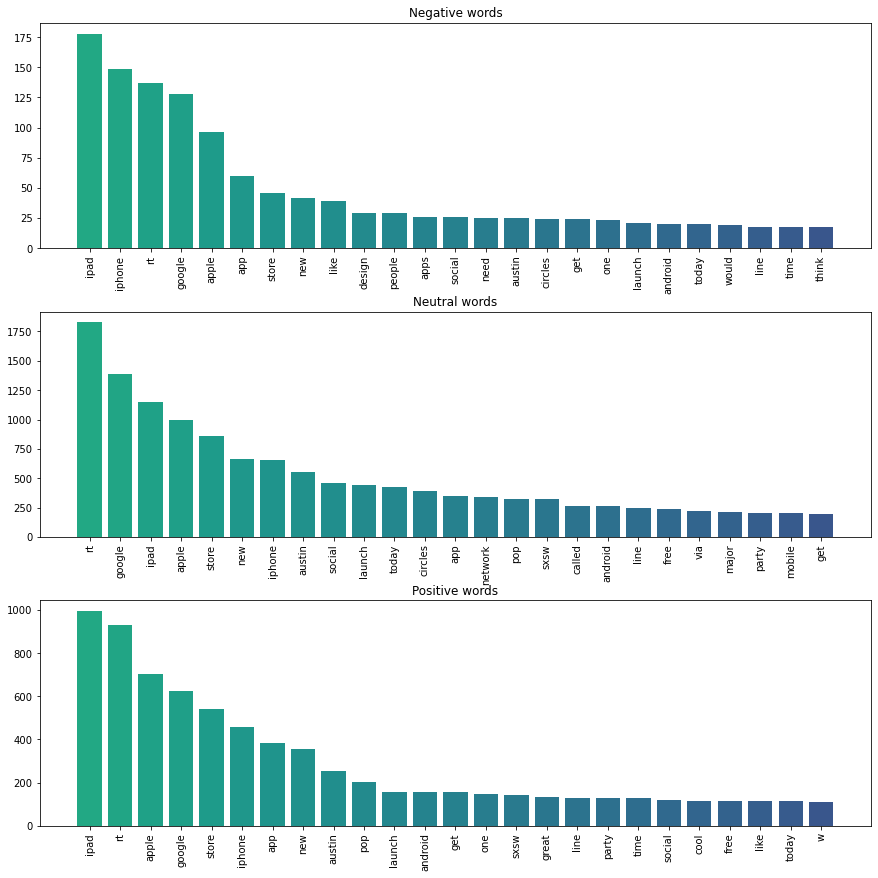

In [48]:
# Plotting negative, positive and neutral words from the tweets
new_figure = plt.figure(figsize=(12,12))
# set the color of our bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

ax = new_figure.add_subplot(311)
ax2 = new_figure.add_subplot(312)
ax3 = new_figure.add_subplot(313)

# Generate a line plot on first axes
ax.bar(negative_bar_words, negative_bar_counts, color= color)

# Draw a scatter plot on 2nd axes
ax2.bar(neutral_bar_words, neutral_bar_counts, color=color)

# Draw a scatter plot on 2nd axes
ax3.bar(positive_bar_words, positive_bar_counts, color=color)

ax.title.set_text('Negative words')
ax2.title.set_text('Neutral words')
ax3.title.set_text('Positive words')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.tight_layout(pad=0)
plt.show()

From the above bar graph, when we see the first graph it shows us the top negative tweet words. word ipad has the highest tweets with more than 175 count and next comes iphone. Similarly in the second bar graph of neutral tweet words, the top word is rt(retweet) with more than 1750 tweets and the next comes Google and ipad. In the third bar graph of positive tweet words, the top word is ipad with almost 1000 tweets and next comes rt and apple. when we analyse all the three bar graph, mostly the same words have been tweeted in all the three (positive, negative, neutral) categories.

### Creating wordcloud

In [49]:
#dictionary for negative, neutral and positive words 
negative_dictionary = dict(zip(negative_bar_words, negative_bar_counts))
neutral_dictionary = dict(zip(neutral_bar_words, neutral_bar_counts))
positive_dictionary = dict(zip(positive_bar_words, positive_bar_counts))

In [50]:
# Creating the fuction wordcloud:
def generate_wordcloud(data):
    wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(data)
    plt.figure(figsize=(10,10),facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

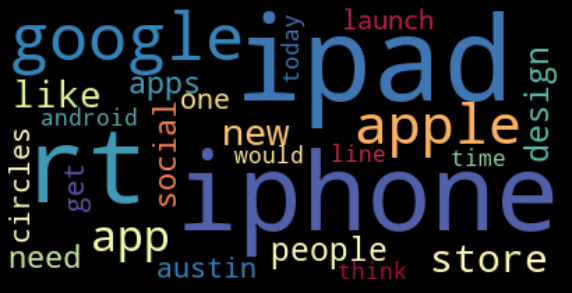

In [51]:
#Generating negative wordcloud
generate_wordcloud(negative_dictionary)

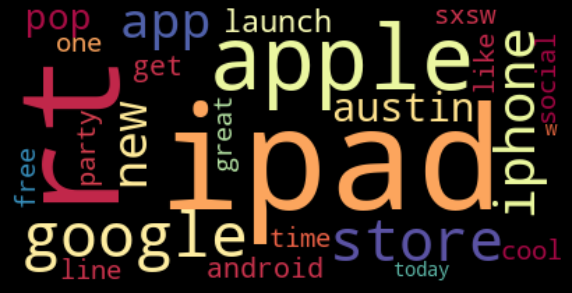

In [52]:
#generating positive wordcloud
generate_wordcloud(positive_dictionary)

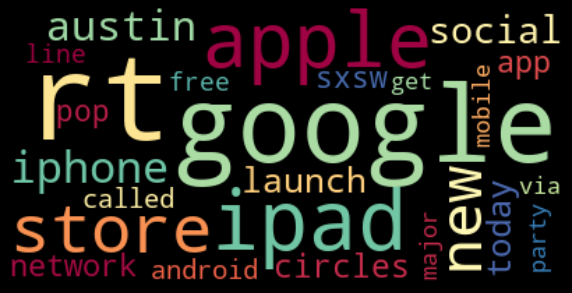

In [53]:
#generating neutral wordcloud
generate_wordcloud(neutral_dictionary)

### Model

Now lets start with the modelling process

For my model i have planned to use Logistic Regression classifier, Naive Bayes classifier, Random Forest classifier, Decision Tree classifier, and XG Boost Classifier. When evaluating the models i have used two metrics, Accuracy and F1 score. F1 score comprises of both recall and precision metric in it. These metrics helps in identifying the model performance and help to find the positive and negative tweets. 

In [54]:
#initiate the variables
data = df['tweet_text']
target = df['emotion']

In [55]:
# applying the function to our data/features 
processed_data = list(map(process_tweet, data))

In [56]:
#indexing the processed data
pd.Series(processed_data)
processed_data[0]

['iphone', 'hrs', 'tweeting', 'dead', 'need', 'upgrade', 'plugin', 'stations']

### Lemmatization 

lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

In [57]:
#lemmatization of tweet_text
lemmatized_output = []
lemmatizer = WordNetLemmatizer() 
for lists in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in lists])
    lemmatized_output.append(lemmed)

In [58]:
#lemmatized output
lemmatized_output[:10]

['iphone hr tweeting dead need upgrade plugin station',
 'know awesome ipad app likely appreciate design also giving free t',
 'wait also sale',
 'hope year festival crashy year iphone app',
 'great stuff fri marissa mayer tim book matt mullenweg',
 'new ipad apps communication showcased conference http',
 'starting around corner hop skip jump good time fan',
 'beautifully smart simple idea rt wrote ipad app http',
 'counting day plus strong canadian dollar mean stock apple gear',
 'excited meet show sprint galaxy still running android']

In [59]:
#initiate X and y
X_lem = lemmatized_output
y_lem = target

### Vectorization

Vectorization is the process of converting text to numerical entries in a matrix form. 

### Tfidf Vectorization (Term Frequency - Inverse Document Frequency)

TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a combination of two individual metrics, which are the TF and IDF, respectively. TF-IDF is used when we have multiple documents. It is based on the idea that rare words contain more information about the content of a document than words that are used many times throughout all the documents

In [60]:
# Implement train/test split of dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_lem, y_lem, test_size=0.20, random_state=42)

In [61]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer()
# Fit the vectorizer
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

### Logistic Regression

In [62]:
#instantiate Logistic Regression
lr = LogisticRegression()
logreg = lr.fit(X_train_tf, y_train)
logreg_train_preds = logreg.predict(X_train_tf)
logreg_test_preds = logreg.predict(X_test_tf)

In f1 score metric im using weighted average to Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 

In [63]:
#calcuate the metrics
f1_train = metrics.f1_score(y_train, logreg_train_preds, average='weighted')
f1_test = metrics.f1_score(y_test, logreg_test_preds, average='weighted')
print('Train Accuracy score:', metrics.accuracy_score(y_train, logreg_train_preds))
print('Test Accuracy score: ', metrics.accuracy_score(y_test, logreg_test_preds))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Train Accuracy score: 0.7985955056179775
Test Accuracy score:  0.6758426966292135
Train F1 score:  0.7779764954803375
Test F1 score:  0.6429886434671748


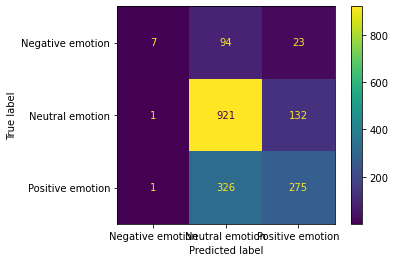

In [64]:
# plot Confusion Matrix
plot_confusion_matrix(logreg, X_test_tf, y_test)
plt.grid(False)

The model has a train accuracy of 80% and test accuracy score of 67%. The train and test f1 score of 78% and 65%. Model didnt perform in predicting positive and negative tweets. There is a class imbalance problem, so im using oversampling  and cross valiadation score. 

In [65]:
#Cross Validation
lr_pipe = make_pipeline(lr)
scores = cross_val_score(lr_pipe, X_train_tf, y_train, cv=5)
scores

array([0.6875    , 0.69803371, 0.66853933, 0.6741573 , 0.68679775])

In [66]:
#Oversampling on Logistic Regression Model

lr_oversample = make_pipeline(SMOTE(random_state=42), lr)
lr_scores = cross_val_score(lr_oversample, X_train_tf, y_train, cv=5)
lr_scores

array([0.64396067, 0.66292135, 0.6502809 , 0.64536517, 0.66924157])

In [67]:
#Instantiate final Logistic Regression model
lr_final_pipe = make_pipeline(SMOTE(random_state = 42), lr)
lr_final_pipe.fit(X_train_tf, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('logisticregression', LogisticRegression())])

In [68]:
lr_train_preds = lr_final_pipe.predict(X_train_tf)
lr_test_preds = lr_final_pipe.predict(X_test_tf)

In [69]:
f1_train = metrics.f1_score(y_train, lr_train_preds, average='weighted')
f1_test = metrics.f1_score(y_test, lr_test_preds, average='weighted')
print('Train Accuracy score:', metrics.accuracy_score(y_train, lr_train_preds))
print('Test Accuracy score: ', metrics.accuracy_score(y_test, lr_test_preds))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Train Accuracy score: 0.8334269662921349
Test Accuracy score:  0.6449438202247191
Train F1 score:  0.8351747356783962
Test F1 score:  0.650218329942598


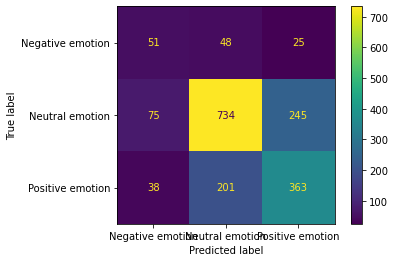

In [70]:
# Confusion Matrix
plot_confusion_matrix(lr_final_pipe, X_test_tf, y_test)
plt.grid(False)

After the cross validation and oversampling techniques there is an improvement in positive and negative tweets. Train accuracy is 83% and test accuracy is 65%. The negative tweets have been improved from 7 to 51 tweets. The positive tweets have been changed from 275 to 363 after applying sampling technique but still the neutral tweets is high with 734 tweets. still the data is overfit. The training f1 score is 83% and test f1 score is 65%.

### Naive Bayes

In [71]:
# Multinomial Naive Bayes
nb_classifier = MultinomialNB()

In [72]:
# Fitting Model
nb_class = nb_classifier.fit(X_train_tf, y_train)
nb_train_preds = nb_class.predict(X_train_tf)
nb_test_preds = nb_class.predict(X_test_tf)

In [73]:
f1_train = metrics.f1_score(y_train, nb_train_preds, average='weighted')
f1_test = metrics.f1_score(y_test, nb_test_preds, average='weighted')
print('Train Accuracy score:', metrics.accuracy_score(y_train, nb_train_preds))
print('Test Accuracy score: ', metrics.accuracy_score(y_test, nb_test_preds))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Train Accuracy score: 0.7529494382022472
Test Accuracy score:  0.6573033707865169
Train F1 score:  0.7129950594462992
Test F1 score:  0.5903952858228007


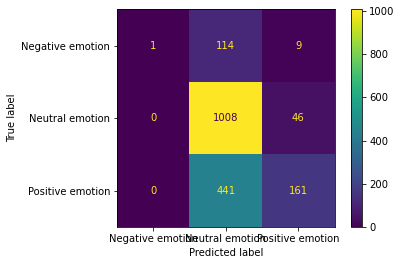

In [74]:
# Confusion Matrix 
plot_confusion_matrix(nb_class,X_test_tf, y_test)
plt.grid(False)

In the naive bayes model, the train accuracy score is 75% and test accuracy score is 65%. There is class imbalance problem and applying oversampling technique. 

In [75]:
# k-fold cross validation
nb_pipe = make_pipeline(nb_class)
scores = cross_val_score(nb_pipe, X_train_tf, y_train, cv=5)
scores

array([0.66151685, 0.67205056, 0.6488764 , 0.64325843, 0.65941011])

In [76]:
# Oversampling on Naive Bayesian model
nb_oversample = make_pipeline(SMOTE(random_state = 42), nb_class)
nb_scores = cross_val_score(nb_oversample, X_train_tf, y_train, cv=5)
nb_scores

array([0.59199438, 0.5997191 , 0.58286517, 0.57935393, 0.6116573 ])

In [77]:
nb_final_pipe = make_pipeline(SMOTE(random_state = 42), nb_class)
nb_final_pipe.fit(X_train_tf, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('multinomialnb', MultinomialNB())])

In [78]:
nb_train_preds = nb_final_pipe.predict(X_train_tf)
nb_test_preds = nb_final_pipe.predict(X_test_tf)

In [79]:
f1_train = metrics.f1_score(y_train, nb_train_preds, average='weighted')
f1_test = metrics.f1_score(y_test, nb_test_preds, average='weighted')
print('Train Accuracy score:', metrics.accuracy_score(y_train, nb_train_preds))
print('Test Accuracy score: ', metrics.accuracy_score(y_test, nb_test_preds))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Train Accuracy score: 0.7658707865168539
Test Accuracy score:  0.604494382022472
Train F1 score:  0.7732828842977941
Test F1 score:  0.6166904707835683


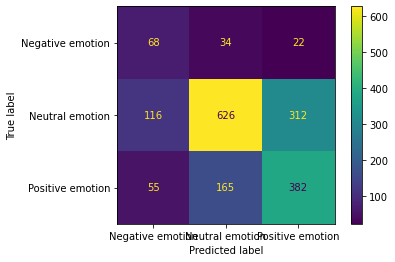

In [80]:
# Confusion Matrix
plot_confusion_matrix(nb_final_pipe, X_test_tf, y_test)
plt.grid(False)

In the final naive bayes model, there was good improvement of predicting positive and negative tweets. before cross validation and oversampling the positive and neagtive tweets were 161 and 1 respectively. After applying techniques the positive tweets were 382 and negative tweets were 68 but still the neutral tweets are higher with 626 tweets. The accuracy score for train set is 76% and 60% for test. f1 score for train and test set is 77% and 62%.

### Random Forest

In [81]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators = 100)

In [82]:
# Fitting the Model
rf_classifier.fit(X_train_tf, y_train)
rf_train_preds = rf_classifier.predict(X_train_tf)
rf_test_preds = rf_classifier.predict(X_test_tf)

In [83]:
f1_train = metrics.f1_score(y_train, rf_train_preds, average='weighted')
f1_test = metrics.f1_score(y_test, rf_test_preds, average='weighted')
print('Train Accuracy score:', metrics.accuracy_score(y_train, rf_train_preds))
print('Test Accuracy score: ', metrics.accuracy_score(y_test, rf_test_preds))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Train Accuracy score: 0.986938202247191
Test Accuracy score:  0.6786516853932584
Train F1 score:  0.9869165792003197
Test F1 score:  0.6530251401027964


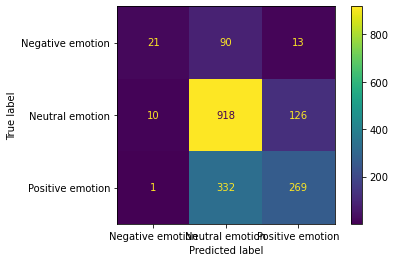

In [84]:
# Confusion Matrix 
plot_confusion_matrix(rf_classifier, X_test_tf, y_test)
plt.grid(False)

The RF train accuracy  and f1 score is 98% and test accuracy score is 68% and 64%. The positive tweets were 266 and negative tweets were 22. Neutral tweets are high with 908 tweets. 

In [85]:
# k-fold cross validation
rf_pipe = make_pipeline(rf_classifier)
scores = cross_val_score(rf_pipe, X_train_tf, y_train, cv=5)
scores

array([0.66994382, 0.68398876, 0.67907303, 0.67626404, 0.68609551])

In [86]:
# Oversampling on Random Forest model
rf_oversample_pipe = make_pipeline(SMOTE(random_state = 42), rf_classifier)
rf_scores = cross_val_score(rf_oversample_pipe, X_train_tf, y_train, cv=5)
rf_scores

array([0.6741573 , 0.69030899, 0.65941011, 0.66994382, 0.67696629])

In [87]:
rf_final_pipe = make_pipeline(SMOTE(random_state=42), rf_classifier)

In [88]:
rf_final_pipe.fit(X_train_tf, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier', RandomForestClassifier())])

In [89]:
rf_train_preds = rf_final_pipe.predict(X_train_tf)
rf_test_preds = rf_final_pipe.predict(X_test_tf)

In [90]:
f1_train = metrics.f1_score(y_train, rf_train_preds, average='weighted')
f1_test = metrics.f1_score(y_test, rf_test_preds, average='weighted')
print('Train Accuracy score:', metrics.accuracy_score(y_train, rf_train_preds))
print('Test Accuracy score: ', metrics.accuracy_score(y_test, rf_test_preds))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Train Accuracy score: 0.9867977528089887
Test Accuracy score:  0.6825842696629213
Train F1 score:  0.9867898809539496
Test F1 score:  0.6665015589186704


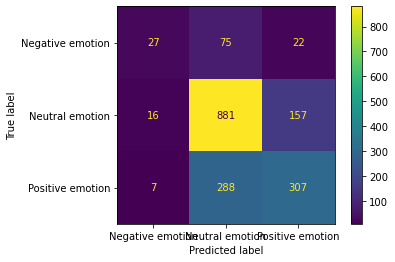

In [91]:
# Confusion Matrix
plot_confusion_matrix(rf_final_pipe, X_test_tf, y_test)
plt.grid(False)

In the final Random Forest model, there was a little improvement of predicting positive and negative tweets. before cross validation and oversampling the positive and neagtive tweets were 266 and 22 respectively. After applying techniques the positive tweets were 309 and negative tweets were 29 but still the neutral tweets are higher with 875 tweets. The accuracy score for train set is 99% and 68% for test. f1 score for train and test set is 99% and 66%.

### Decision Tree 

In [92]:
#decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  

In [93]:
# Fitting the Model
dt_classifier.fit(X_train_tf, y_train)
dt_train_preds = dt_classifier.predict(X_train_tf)
dt_test_preds = dt_classifier.predict(X_test_tf)

In [94]:
f1_train = metrics.f1_score(y_train, dt_train_preds, average='weighted')
f1_test = metrics.f1_score(y_test, dt_test_preds, average='weighted')
print('Train Accuracy score:', metrics.accuracy_score(y_train, dt_train_preds))
print('Test Accuracy score: ', metrics.accuracy_score(y_test, dt_test_preds))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Train Accuracy score: 0.986938202247191
Test Accuracy score:  0.6230337078651685
Train F1 score:  0.9869026585375519
Test F1 score:  0.6134207263291641


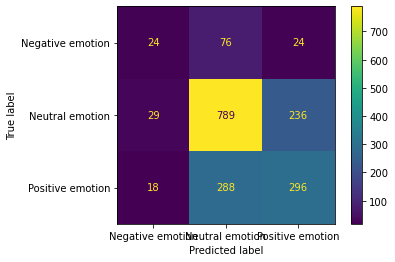

In [95]:
# Confusion Matrix 
plot_confusion_matrix(dt_classifier, X_test_tf, y_test)
plt.grid(False)

In [96]:
# k-fold cross val
dt_pipe = make_pipeline(dt_classifier)
scores = cross_val_score(dt_pipe, X_train_tf, y_train, cv=5)
scores

array([0.62008427, 0.61938202, 0.61797753, 0.62289326, 0.62640449])

In [97]:
# Oversampling on Random Forest model
dt_oversample_pipe = make_pipeline(SMOTE(random_state = 42), dt_classifier)
dt_scores = cross_val_score(dt_oversample_pipe, X_train_tf, y_train, cv=5)
dt_scores

array([0.60814607, 0.60814607, 0.61867978, 0.60252809, 0.61587079])

In [98]:
dt_final_pipe = make_pipeline(SMOTE(random_state = 42), dt_classifier)

In [99]:
dt_final_pipe.fit(X_train_tf, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [100]:
dt_train_preds = dt_final_pipe.predict(X_train_tf)
dt_test_preds = dt_final_pipe.predict(X_test_tf)

In [101]:
f1_train = metrics.f1_score(y_train, dt_train_preds, average='weighted')
f1_test = metrics.f1_score(y_test, dt_test_preds, average='weighted')
print('Train Accuracy score:', metrics.accuracy_score(y_train, dt_train_preds))
print('Test Accuracy score: ', metrics.accuracy_score(y_test, dt_test_preds))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Train Accuracy score: 0.9867977528089887
Test Accuracy score:  0.6219101123595505
Train F1 score:  0.9867647325073445
Test F1 score:  0.6229431292999137


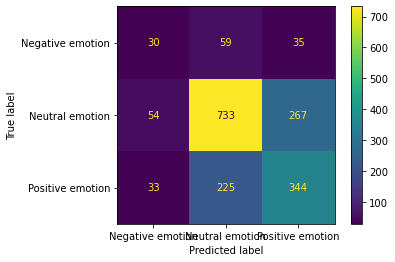

In [102]:
# Confusion Matrix
plot_confusion_matrix(dt_final_pipe, X_test_tf, y_test)
plt.grid(False)

In the final model of decision tree classifier, the train accuracy is 99% and test accurcy is 62%. There was no improvement after cross validation and over sampling techniques. The f1 score also remains the same. There are 344 true positive tweets and 30 true negative tweets. still the neutral tweets are high with 733 tweets. 

### XG Boost

In [103]:
# Initiate the model
xgb_classifier = XGBClassifier(random_state=42)

In [104]:
# Fitting Model
xgb_classifier.fit(X_train_tf, y_train)
xgb_train_preds = xgb_classifier.predict(X_train_tf)
xgb_test_preds = xgb_classifier.predict(X_test_tf)

In [105]:
f1_train = metrics.f1_score(y_train, xgb_train_preds, average='weighted')
f1_test = metrics.f1_score(y_test, xgb_test_preds, average='weighted')
print('Train Accuracy score:', metrics.accuracy_score(y_train, xgb_train_preds))
print('Test Accuracy score: ', metrics.accuracy_score(y_test, xgb_test_preds))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Train Accuracy score: 0.8228932584269663
Test Accuracy score:  0.6646067415730337
Train F1 score:  0.8100556274142777
Test F1 score:  0.6318807922915051


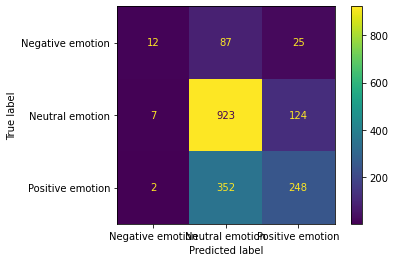

In [106]:
# Confusion Matrix 
plot_confusion_matrix(xgb_classifier, X_test_tf, y_test)
plt.grid(False)

In [107]:
# k-fold cross validation
xgb_pipe = make_pipeline(xgb_classifier)
scores = cross_val_score(xgb_pipe, X_train_tf, y_train, cv=5)
scores

array([0.66994382, 0.6755618 , 0.68328652, 0.66853933, 0.68258427])

In [108]:
# Oversampling on Random Forest model
xgb_oversample_pipe = make_pipeline(SMOTE(random_state = 42), xgb_classifier)
xgb_scores = cross_val_score(xgb_oversample_pipe, X_train_tf, y_train, cv=5)
xgb_scores

array([0.6622191 , 0.66853933, 0.66151685, 0.66151685, 0.67134831])

In [109]:
xgb_final_pipe = make_pipeline(SMOTE(random_state = 42), xgb_classifier)

In [110]:
xgb_final_pipe.fit(X_train_tf, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [111]:
xgb_train_preds = xgb_final_pipe.predict(X_train_tf)
xgb_test_preds = xgb_final_pipe.predict(X_test_tf)

In [112]:
f1_train = metrics.f1_score(y_train, xgb_train_preds, average='weighted')
f1_test = metrics.f1_score(y_test, xgb_test_preds, average='weighted')
print('Train Accuracy score:', metrics.accuracy_score(y_train, xgb_train_preds))
print('Test Accuracy score: ', metrics.accuracy_score(y_test, xgb_test_preds))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Train Accuracy score: 0.8127808988764045
Test Accuracy score:  0.6707865168539325
Train F1 score:  0.8037018318781425
Test F1 score:  0.6523834490372314


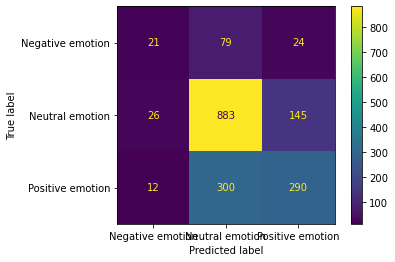

In [113]:
# Confusion Matrix
plot_confusion_matrix(xgb_final_pipe, X_test_tf, y_test)
plt.grid(False)

In the final model of XGBoost classifier, the train accuracy is 81% and test accurcy is 67%. There was no big improvement after cross validation and over sampling techniques. The accuracy values remains almost the same. There are 290 true positive tweets and 21 true negative tweets. still the neutral tweets are high with 883 tweets. 

### Deep Neural Network

Since these classifiers aren't seeing great results, I'm going to take this a step further with deep neural networks.

In [114]:
#import necessary keras packages
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.preprocessing import text, sequence

In [115]:
from nltk import FreqDist, regexp_tokenize
# Pattern to capture words with apostrophes as one token
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

# Casting tweet_text to string or the tokenization doesn't work
df['tweet_text'] = df['tweet_text'].astype('str')

# Tokenizing tweets and inserting into df
df['raw_tokens'] = df['tweet_text'].map(lambda x: regexp_tokenize(x, pattern))

# Lowercase all tokens
df['raw_tokens'] = df['raw_tokens'].map(lambda x: [y.lower() for y in x])

In [116]:
#listing the stop words and creating a column in dataframe
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', 's', '2']
df['raw_tokens_stopped'] = df['raw_tokens'].map(lambda x: [y for y in x if y not in stopwords_list])

In [117]:
#tokenize and pad the sequence the tweets
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(df['raw_tokens_stopped']))
list_tokenized = tokenizer.texts_to_sequences(df['raw_tokens_stopped'])
X_values = sequence.pad_sequences(list_tokenized, maxlen=100)

In [118]:
y_values= pd.get_dummies(target).values

In [119]:
# Implement train/test split of dataset
X_train_tk, X_test_tk,y_train_tk,y_test_tk = train_test_split(X_values,y_values,
                                                            test_size=0.20,
                                                            random_state=42)

In [120]:
X_train_tk.shape

(7120, 100)

In [121]:
y_train_tk.shape

(7120, 3)

Both variables appear to be the right dimesions. Time to try a neural net. I'm going to build a sequential model, starting with an embedding layer of 20,000 words, which is the number of words in the tokenizer. I'm setting the embedding size as 128. I am then adding two layers, an LSTM and dense layers. To keep it simple, I'm going to run this for 6 epochs.

In [122]:
#architecture including an embedding layer, LSTM layer
embedding_size = 128
model = Sequential()
n = 7120
model.add(Embedding(20000, embedding_size, input_length=100))
model.add(LSTM(48, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

My model will evaluate on accuracy, and use the selected loss function and optimizer, since it is multiclass classification problem.

In [123]:
#compiling the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [124]:
#checking the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 48)                33984     
_________________________________________________________________
dropout (Dropout)            (None, 48)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                2450      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 153       
Total params: 2,596,587
Trainable params: 2,596,587
Non-trainable params: 0
______________________________________________

In [125]:
#fitting the model on training data with epochs=3
history = model.fit(X_train_tk, y_train_tk, epochs=3, batch_size= 32, validation_split=0.1)

Epoch 1/3
201/201 [==============================] - 15s 75ms/step - loss: 0.8705 - accuracy: 0.5918 - val_loss: 0.7649 - val_accuracy: 0.6236
Epoch 2/3
201/201 [==============================] - 17s 82ms/step - loss: 0.6925 - accuracy: 0.6918 - val_loss: 0.7385 - val_accuracy: 0.6545
Epoch 3/3
201/201 [==============================] - 16s 78ms/step - loss: 0.4880 - accuracy: 0.8081 - val_loss: 0.8623 - val_accuracy: 0.6699


In the LSTM Network was able to achieve a validation accuracy around 60% after only three epochs of training. It's likely if we train for more epochs, the performance would improve even further.

In [126]:
#fitting the model on training data with epochs=6
history = model.fit(X_train_tk, y_train_tk, epochs=6, batch_size= 32, validation_split=0.1)

Epoch 1/6
201/201 [==============================] - 17s 86ms/step - loss: 0.3747 - accuracy: 0.8542 - val_loss: 0.9545 - val_accuracy: 0.6756
Epoch 2/6
201/201 [==============================] - 16s 77ms/step - loss: 0.3010 - accuracy: 0.8881 - val_loss: 1.0524 - val_accuracy: 0.6559
Epoch 3/6
201/201 [==============================] - 15s 76ms/step - loss: 0.2574 - accuracy: 0.9028 - val_loss: 1.1427 - val_accuracy: 0.6615
Epoch 4/6
201/201 [==============================] - 19s 93ms/step - loss: 0.2196 - accuracy: 0.9148 - val_loss: 1.2756 - val_accuracy: 0.6728
Epoch 5/6
201/201 [==============================] - 18s 88ms/step - loss: 0.1969 - accuracy: 0.9218 - val_loss: 1.4442 - val_accuracy: 0.6685
Epoch 6/6
201/201 [==============================] - 16s 80ms/step - loss: 0.1746 - accuracy: 0.9251 - val_loss: 1.4647 - val_accuracy: 0.6475


In [127]:
#evaluating the score for train and test data
train_score = model.evaluate(X_train_tk, y_train_tk)
test_score = model.evaluate(X_test_tk, y_test_tk)
print('Train score:', train_score)
print('Test Score:', test_score)

56/56 [==============================] - 1s 11ms/step - loss: 1.4106 - accuracy: 0.6573
Train score: [0.2648613452911377, 0.9133427143096924]
Test Score: [1.4106169939041138, 0.6573033928871155]


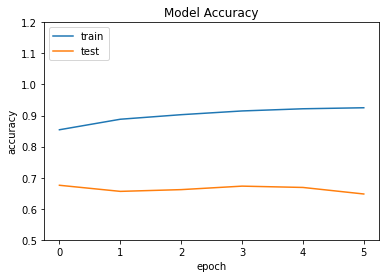

In [128]:
#plotting the Accuracy between training and test sets
import matplotlib.pyplot as plt
plt.ylim(0.5,1.2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

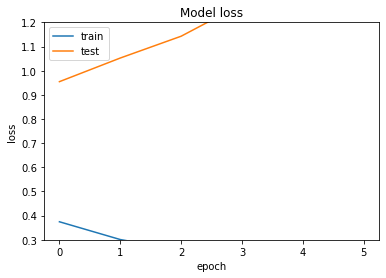

In [129]:
#plotting the loss between training and test sets
plt.ylim(0.3,1.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Neural network achieved 93% accuracy on the training set and the loss function is 0.35. Accuracy of test set is 64% and the loss function is 2.85. loss function is high.

In [130]:
#Making Predictions on Single instance
tweet ='Beautifully smart and simple idea'
tokenizer.fit_on_texts([tweet])
list_tokenized1 = tokenizer.texts_to_sequences(tweet)
X_val = sequence.pad_sequences(list_tokenized1, maxlen=100)
model.predict(X_val)

array([[0.02015162, 0.8290894 , 0.15075903],
       [0.49435213, 0.42408207, 0.08156572],
       [0.31145692, 0.40880084, 0.27974224],
       [0.310888  , 0.4185653 , 0.27054664],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.05177566, 0.79292977, 0.15529455],
       [0.310888  , 0.4185653 , 0.27054664],
       [0.2192797 , 0.6628274 , 0.11789293],
       [0.2192797 , 0.6628274 , 0.11789293],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.02280531, 0.7554589 , 0.22173579],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.06778891, 0.55330086, 0.37891024],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.

In [131]:
#Making Predictions on Single instance
tweet ='this phone and i am vey good'
tokenizer.fit_on_texts([tweet])
list_tokenized1 = tokenizer.texts_to_sequences(tweet)
X_val = sequence.pad_sequences(list_tokenized1, maxlen=100)
model.predict(X_val)

array([[0.31145692, 0.40880084, 0.27974224],
       [0.68838435, 0.18056081, 0.13105482],
       [0.21823235, 0.4490154 , 0.33275232],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.00135807, 0.9593018 , 0.03934011],
       [0.68838435, 0.18056081, 0.13105482],
       [0.31145692, 0.40880084, 0.27974224],
       [0.06778891, 0.55330086, 0.37891024],
       [0.49435213, 0.42408207, 0.08156572],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.06778891, 0.55330086, 0.37891024],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.21823235, 0.4490154 , 0.33275232],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.31145692, 0.40880084, 0.27974224],
       [0.237983  , 0.38749033, 0.3745266 ],
       [0.49435213, 0.42408207, 0.08156572],
       [0.

## Conclusion and Next Step

- These models show some success in predicting Twitter sentiment. I would recommend the Random Forest Classification model. This model was relatively successful in extracting both negative and positive tweet sentiments, and is conservative in how many inaccuracies it is making compared to the rest of the models. 
- The data seems to be heavily grounded in tech, with the number one key word being a hashtag for a tech confrence. Furthermore, iPad, Google, Apple, and iPhone are extremely prevalent key words. I believe this model is possibly associating certain tech words or brands with positive or negative sentiment. The process must be repeated with a larger data set that has a diverse field of interest.


- Adding more data could also allow the use of a simpler neural net model, which could help to reduce runtimes.
- Further tuning of models using grid search. This would have allowed all the models to be tuned to the precise settings that would yield the good results.
